In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
OKABE_ITO_SCALE = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
""
%load_ext autoreload
%autoreload 2

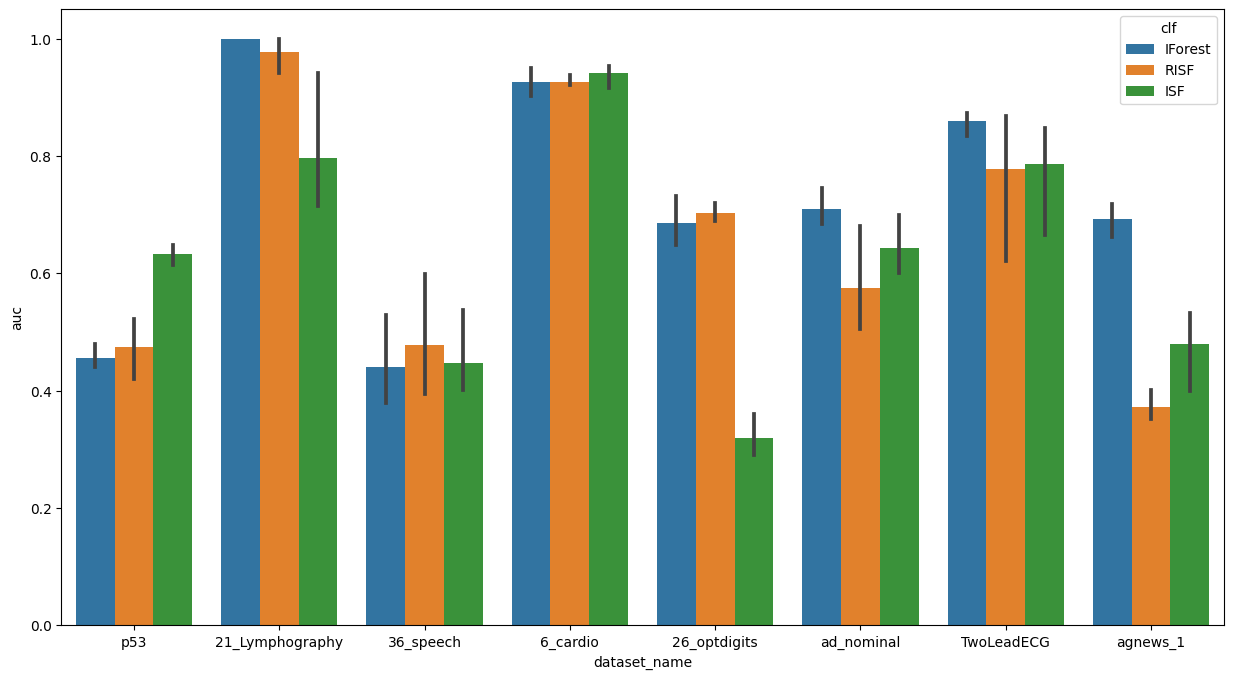

In [3]:
df = pd.read_csv('../results/results_default.csv')
sns.barplot(data=df, x="dataset_name", y="auc", hue="clf")
plt.gcf().set_size_inches(15, 8) # We don't need to check Isolation forest, maybe just for debugging.

In [2]:
def sensitivity_plot(csv_path, parameter_name, col_wrap=4):
    results = pd.read_csv(csv_path)
    sns.set_palette(sns.color_palette(OKABE_ITO_SCALE))
    g = sns.relplot(data=results, x=parameter_name, y="auc", hue="clf", marker="o", col="dataset_name", col_wrap=col_wrap, 
                facet_kws={'sharey': False, 'sharex': False}, kind="line")
    g.set(ylim=(0, 1))
    g.fig.suptitle(f'influence of {parameter_name} on AUC')
    plt.gcf().set_size_inches(20, 10)

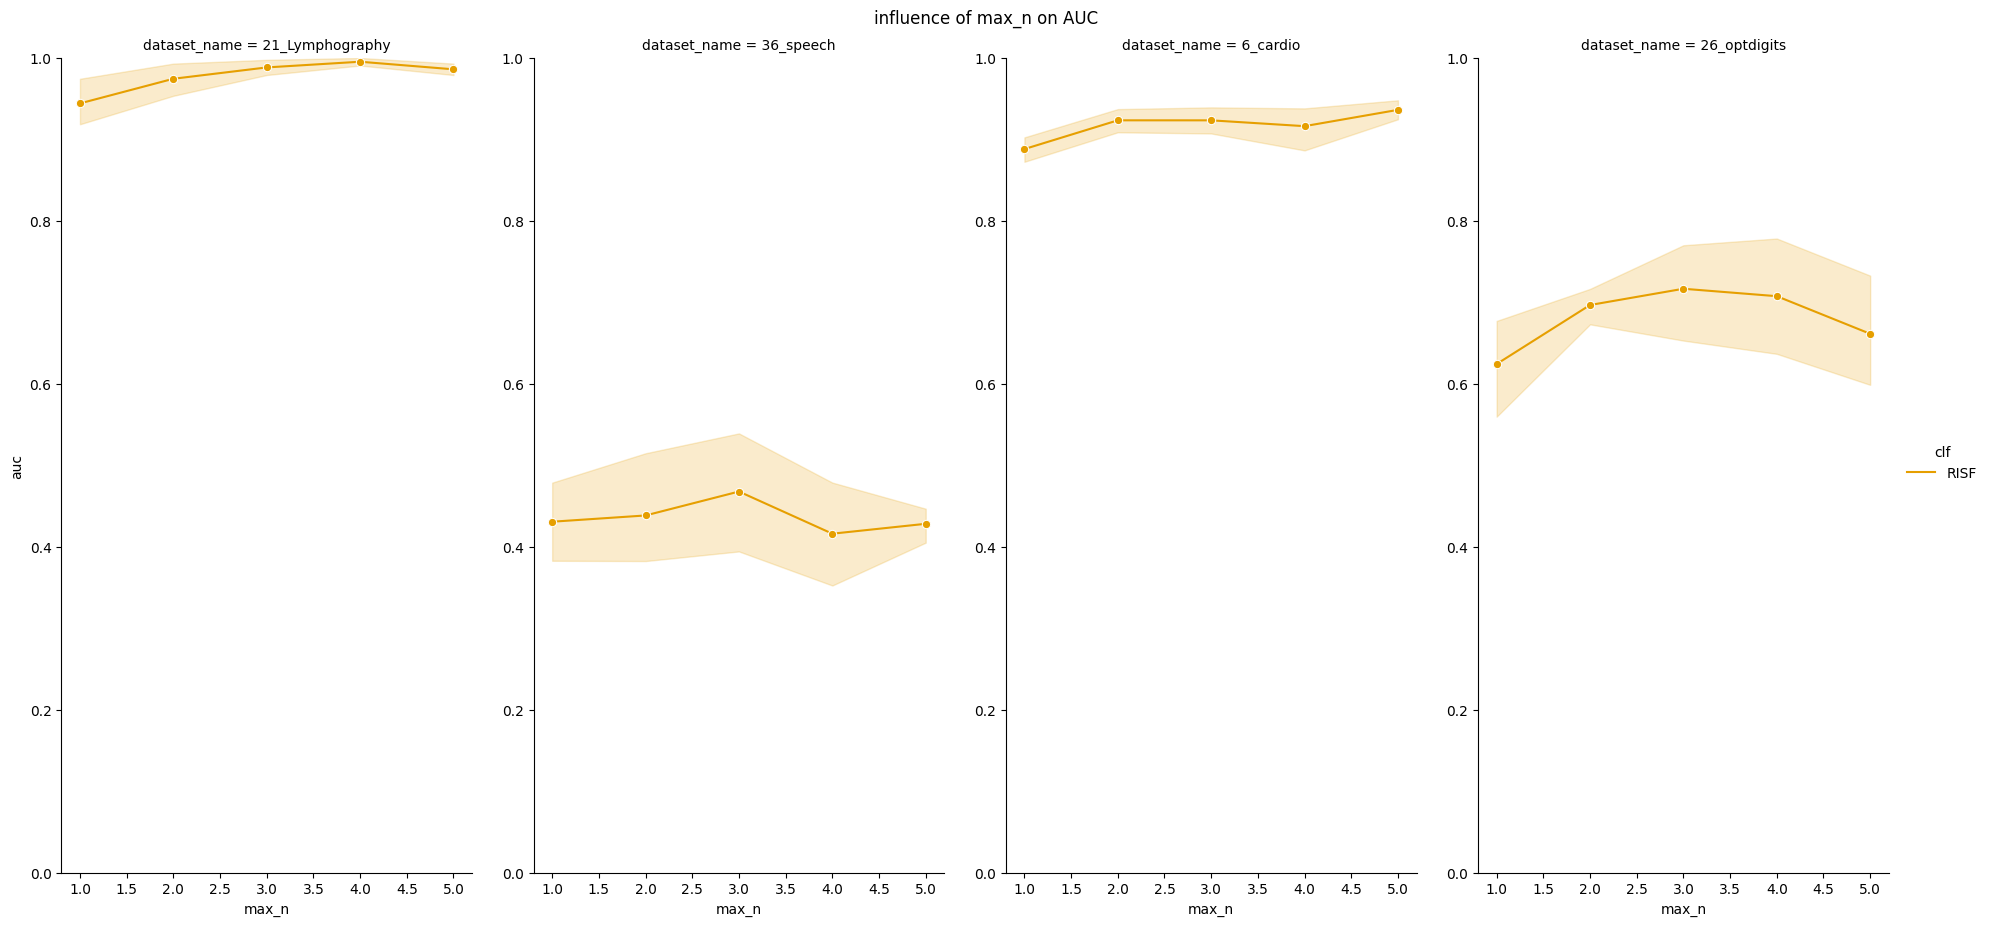

In [3]:
sensitivity_plot("../results/results_max_n.csv", "max_n")

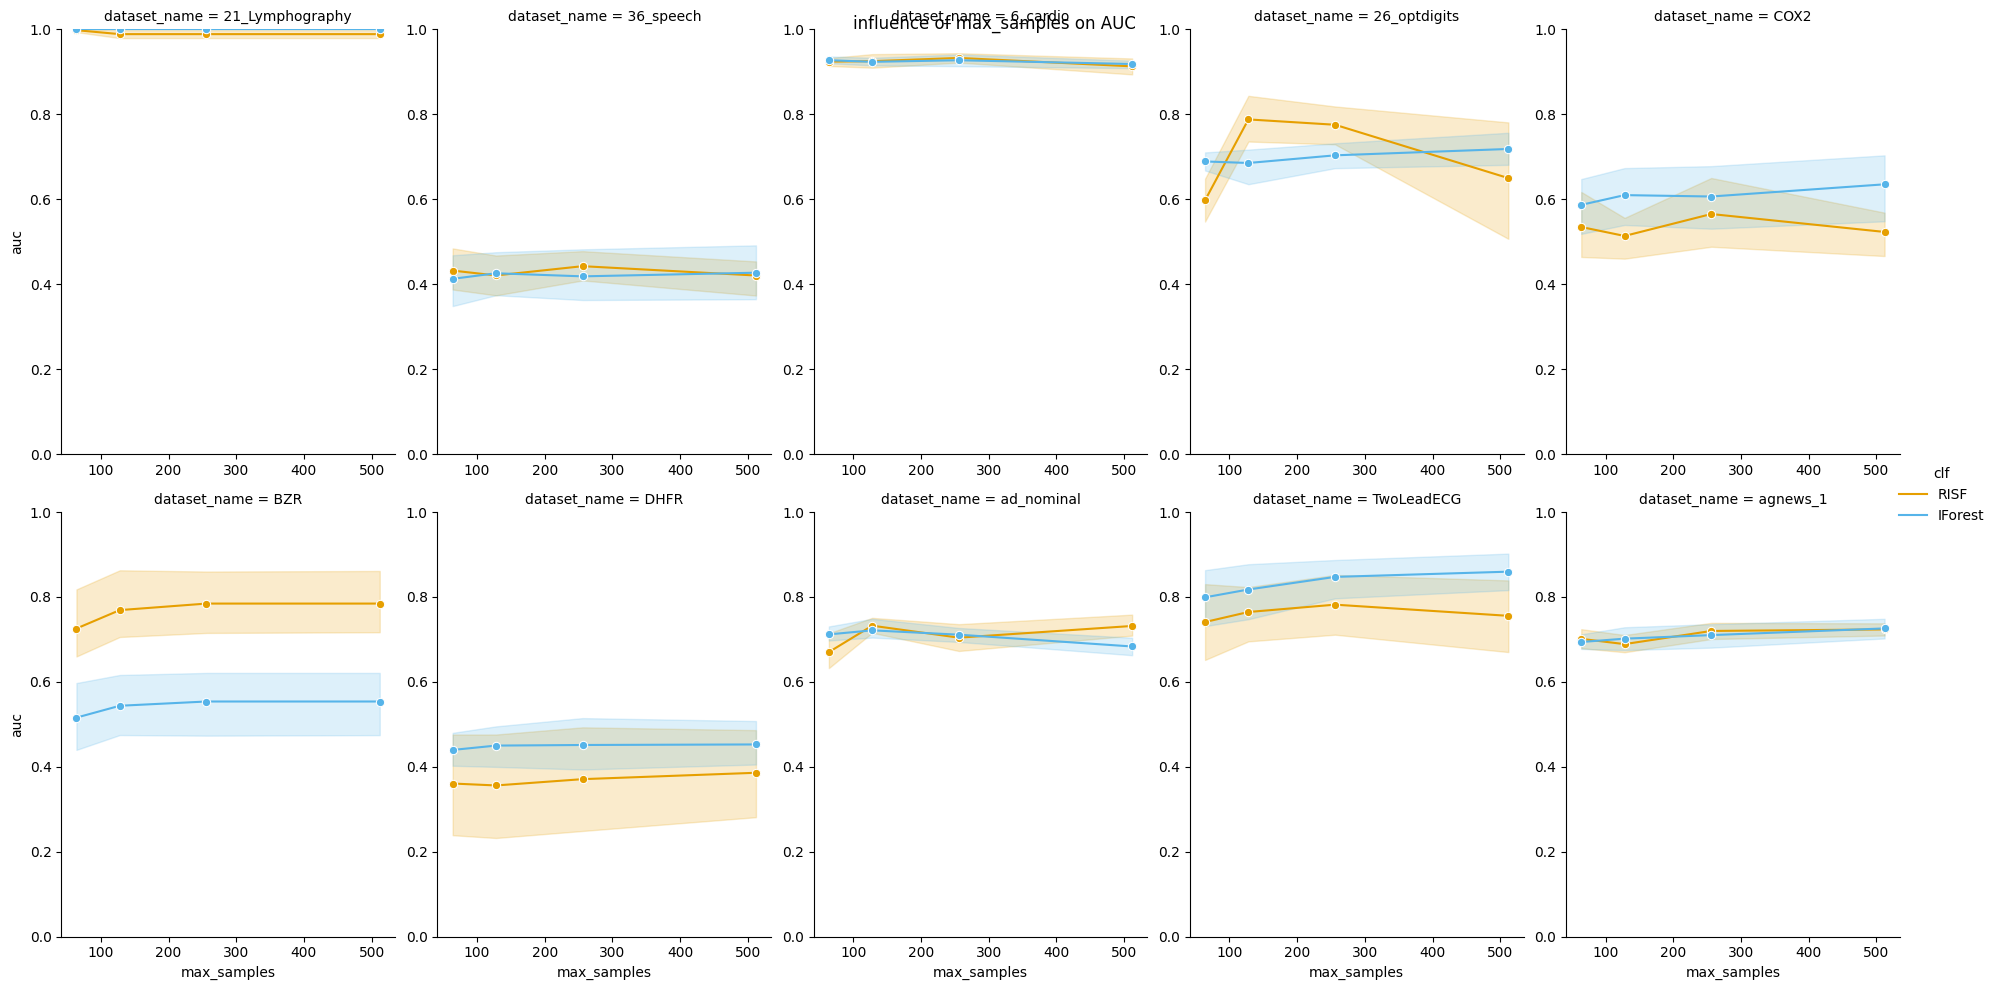

In [4]:
sensitivity_plot("../results/results_max_samples.csv", "max_samples",5)

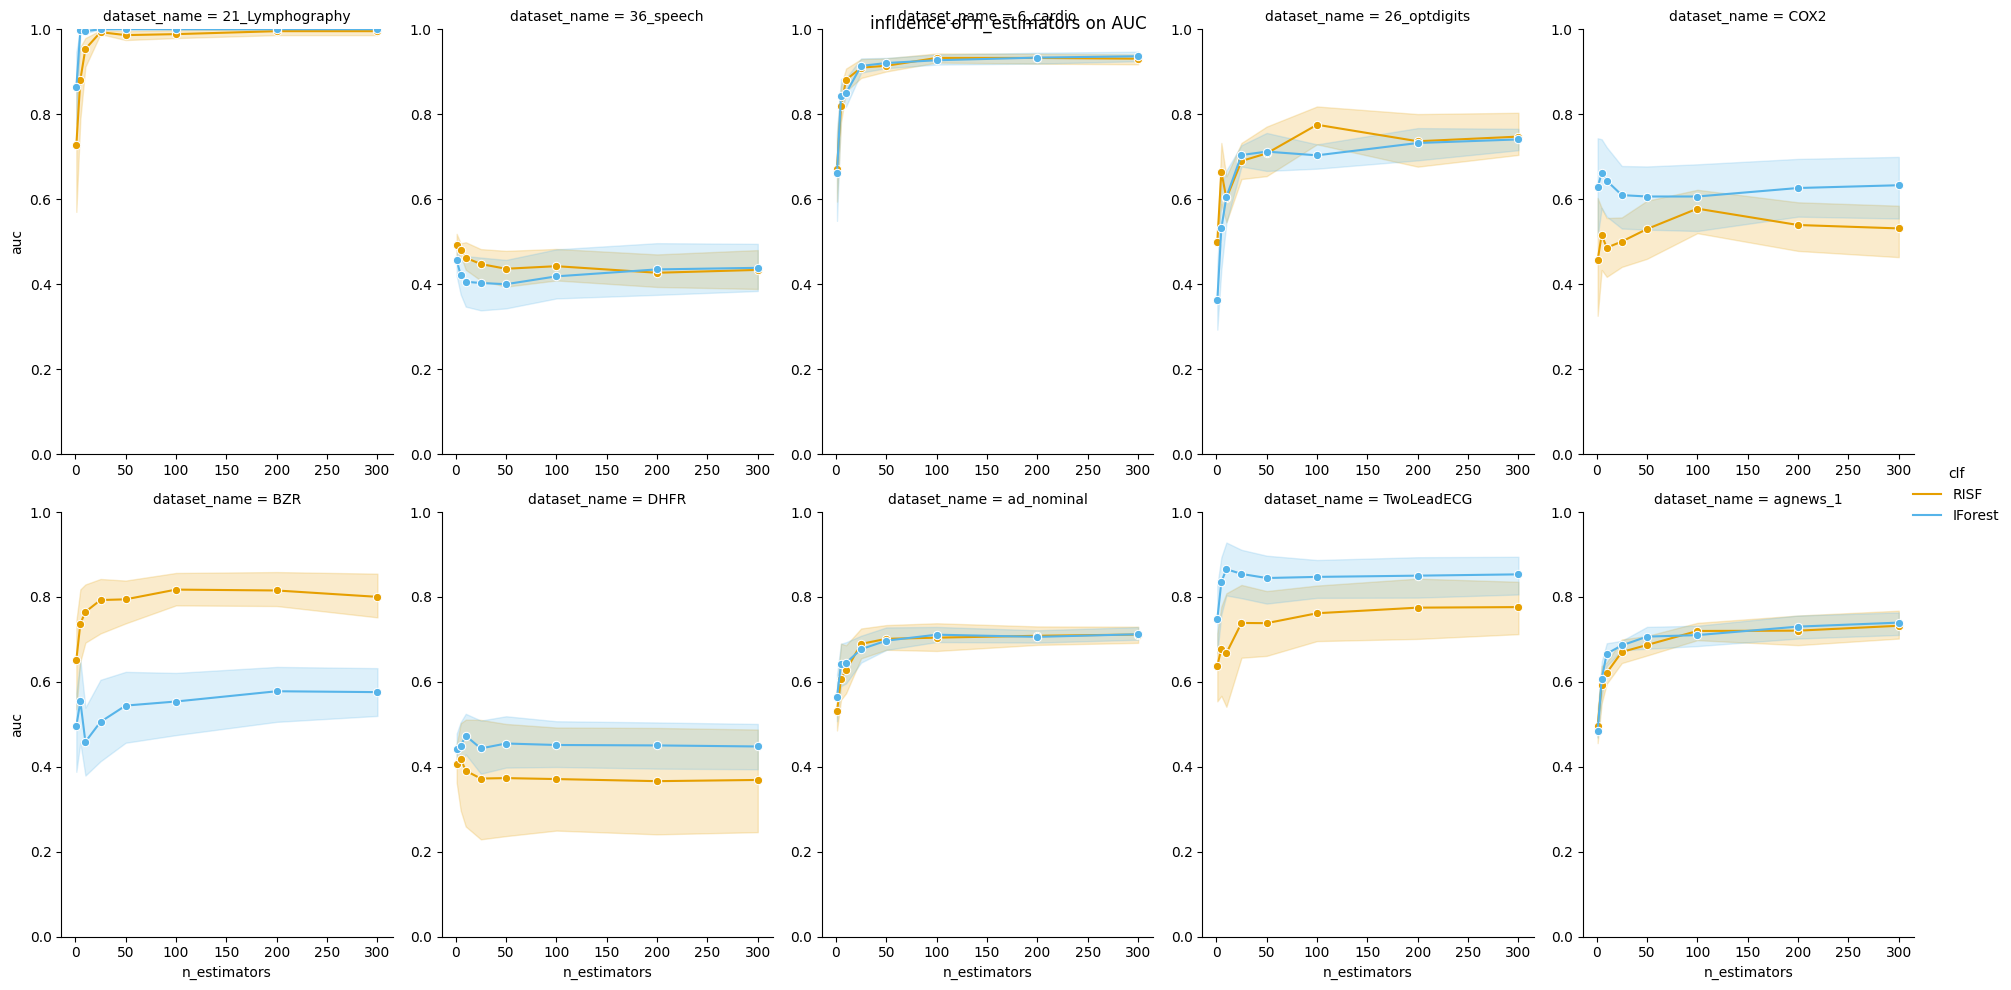

In [5]:
sensitivity_plot("../results/results_n_estimators.csv", "n_estimators", 5)

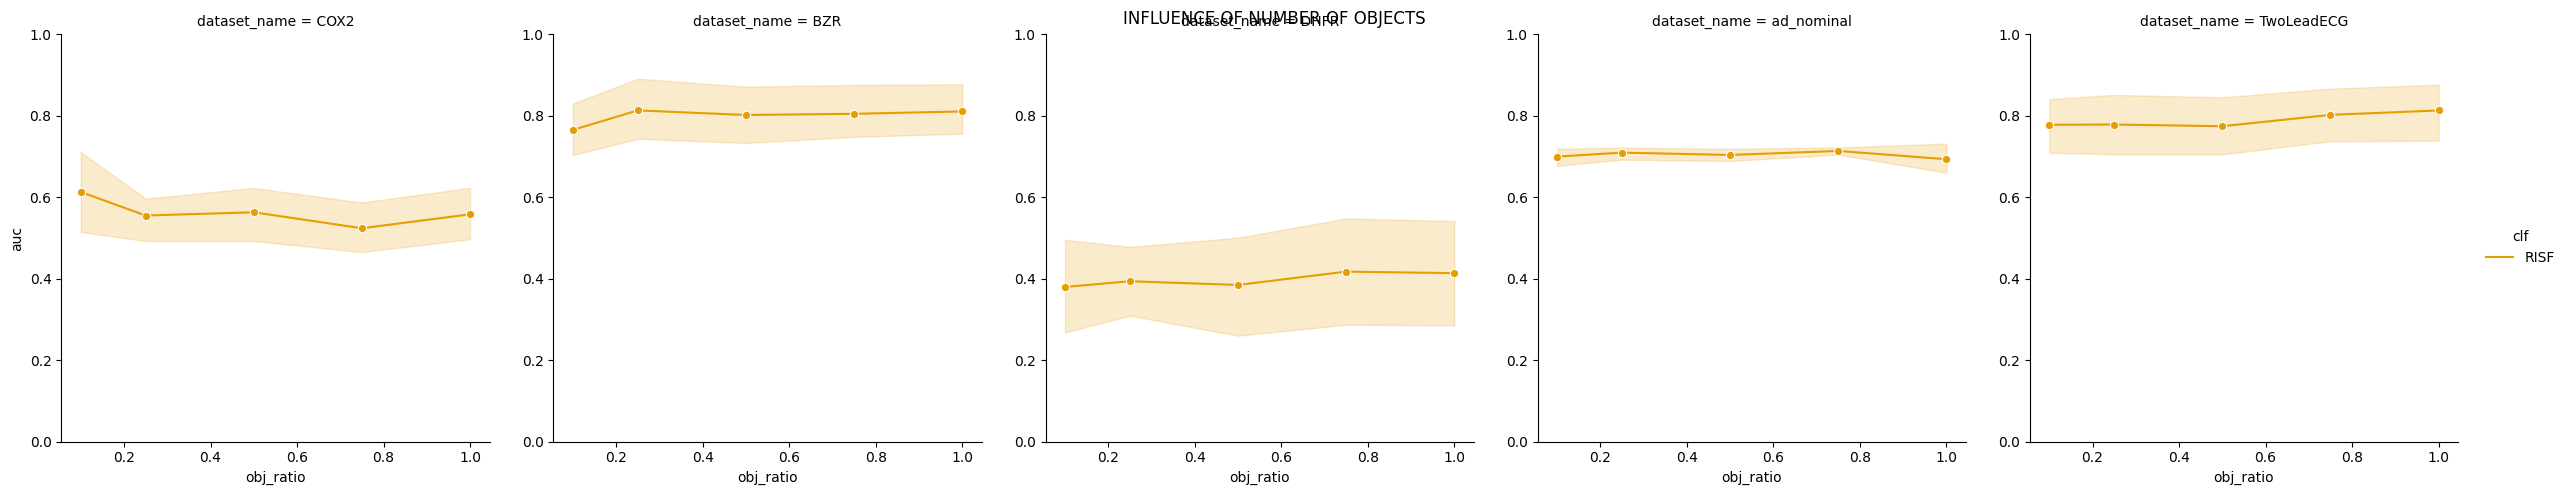

In [7]:
results_df = pd.read_csv("../results/results_selected_obj_Ratio.csv")
sns.set_palette(sns.color_palette(OKABE_ITO_SCALE))
g = sns.relplot(data=results_df, x="obj_ratio", y="auc", hue="clf", marker="o", col="dataset_name", col_wrap=5, 
            facet_kws={'sharey': False, 'sharex': False}, kind="line")

g.fig.suptitle('INFLUENCE OF NUMBER OF OBJECTS')
g.set(ylim=(0, 1))
sns.despine()

In [8]:
import numpy as np
def plot_top_n_dists(results, n=7):
    if_default = pd.read_csv("../results/results_if_default.csv")
    grouped = results.groupby(['dataset_name', 'distances']) 
    grouped_mean = grouped.mean().reset_index()
    datasets = grouped_mean.dataset_name.unique()
    fig, ax = plt.subplots(1, len(datasets),  figsize=(10 * len(datasets), 10))
    
    if not isinstance(ax, np.ndarray):
        ax = [ax]

    for i in range(0, len(datasets)):
        dataset_name = grouped_mean.dataset_name.unique()[i]
        if_score = if_default[if_default.dataset_name == dataset_name].auc.values
        if_mean = if_score.mean()
        if_std = if_score.std()
        top_n_dists = grouped_mean[grouped_mean.dataset_name == dataset_name].sort_values(by=['auc'], ascending=False).head(n).distances.values

        to_plot = results[results.dataset_name == dataset_name]
        to_plot = to_plot[to_plot.distances.isin(top_n_dists)]
        
        to_plot["index"] = to_plot["distances"].apply(lambda x: list(top_n_dists).index(x))
        to_plot = to_plot.sort_values(by=['index'])
        sns.barplot(data=to_plot, x="distances", y="auc", ax=ax[i])
        ax[i].set_title(dataset_name)
        ax[i].tick_params(labelrotation=45)
        ax[i].axhline(if_mean, ls='-', color='red', lw=3, label='IF default')
        
    fig.suptitle("Different distance functions combinations comparisons")
    

C:\Users\sebas\AppData\Local\Temp\ipykernel_12608\949431665.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


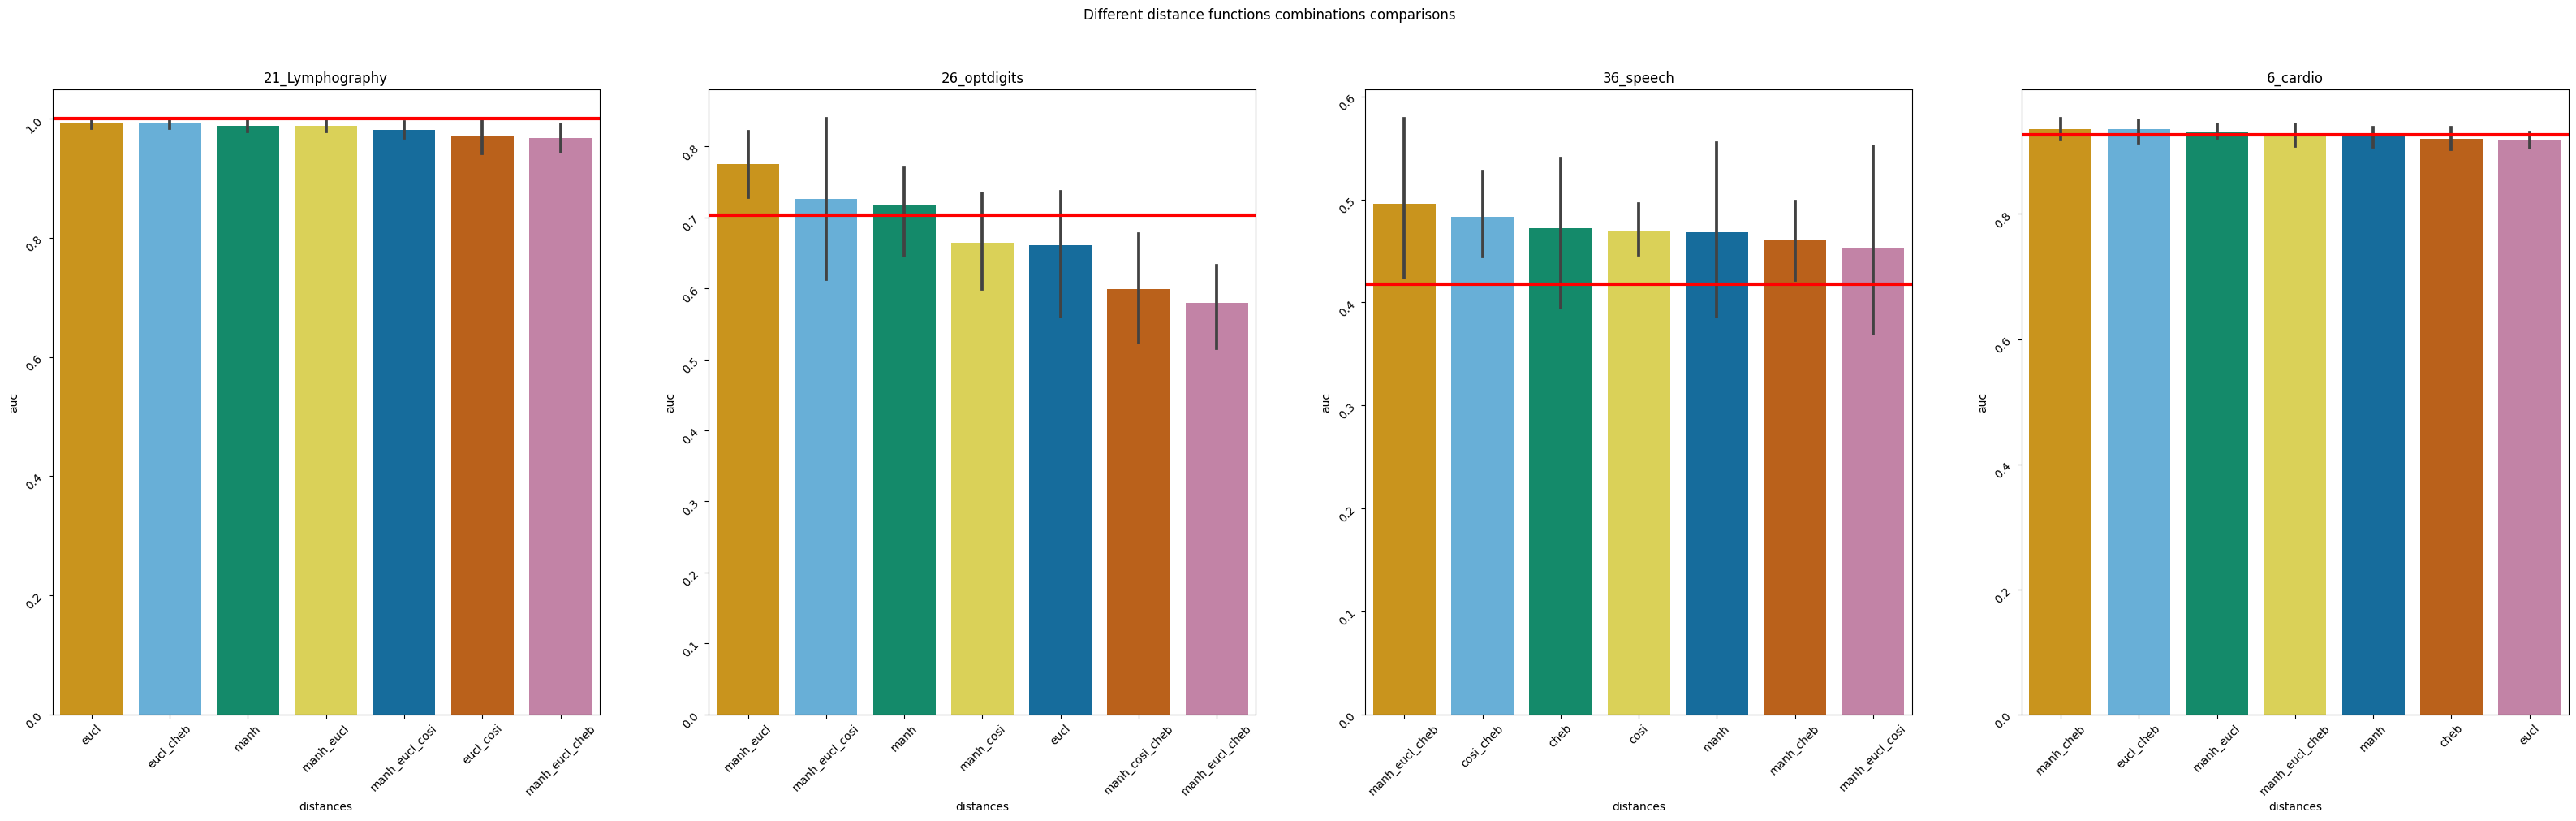

In [9]:
from pathlib import Path
SELECTED_PATH = Path("../results/selected_distances")
num_df = pd.read_csv(SELECTED_PATH / "results_selected_distances_numerical.csv")
plot_top_n_dists(num_df)

C:\Users\sebas\AppData\Local\Temp\ipykernel_12608\949431665.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


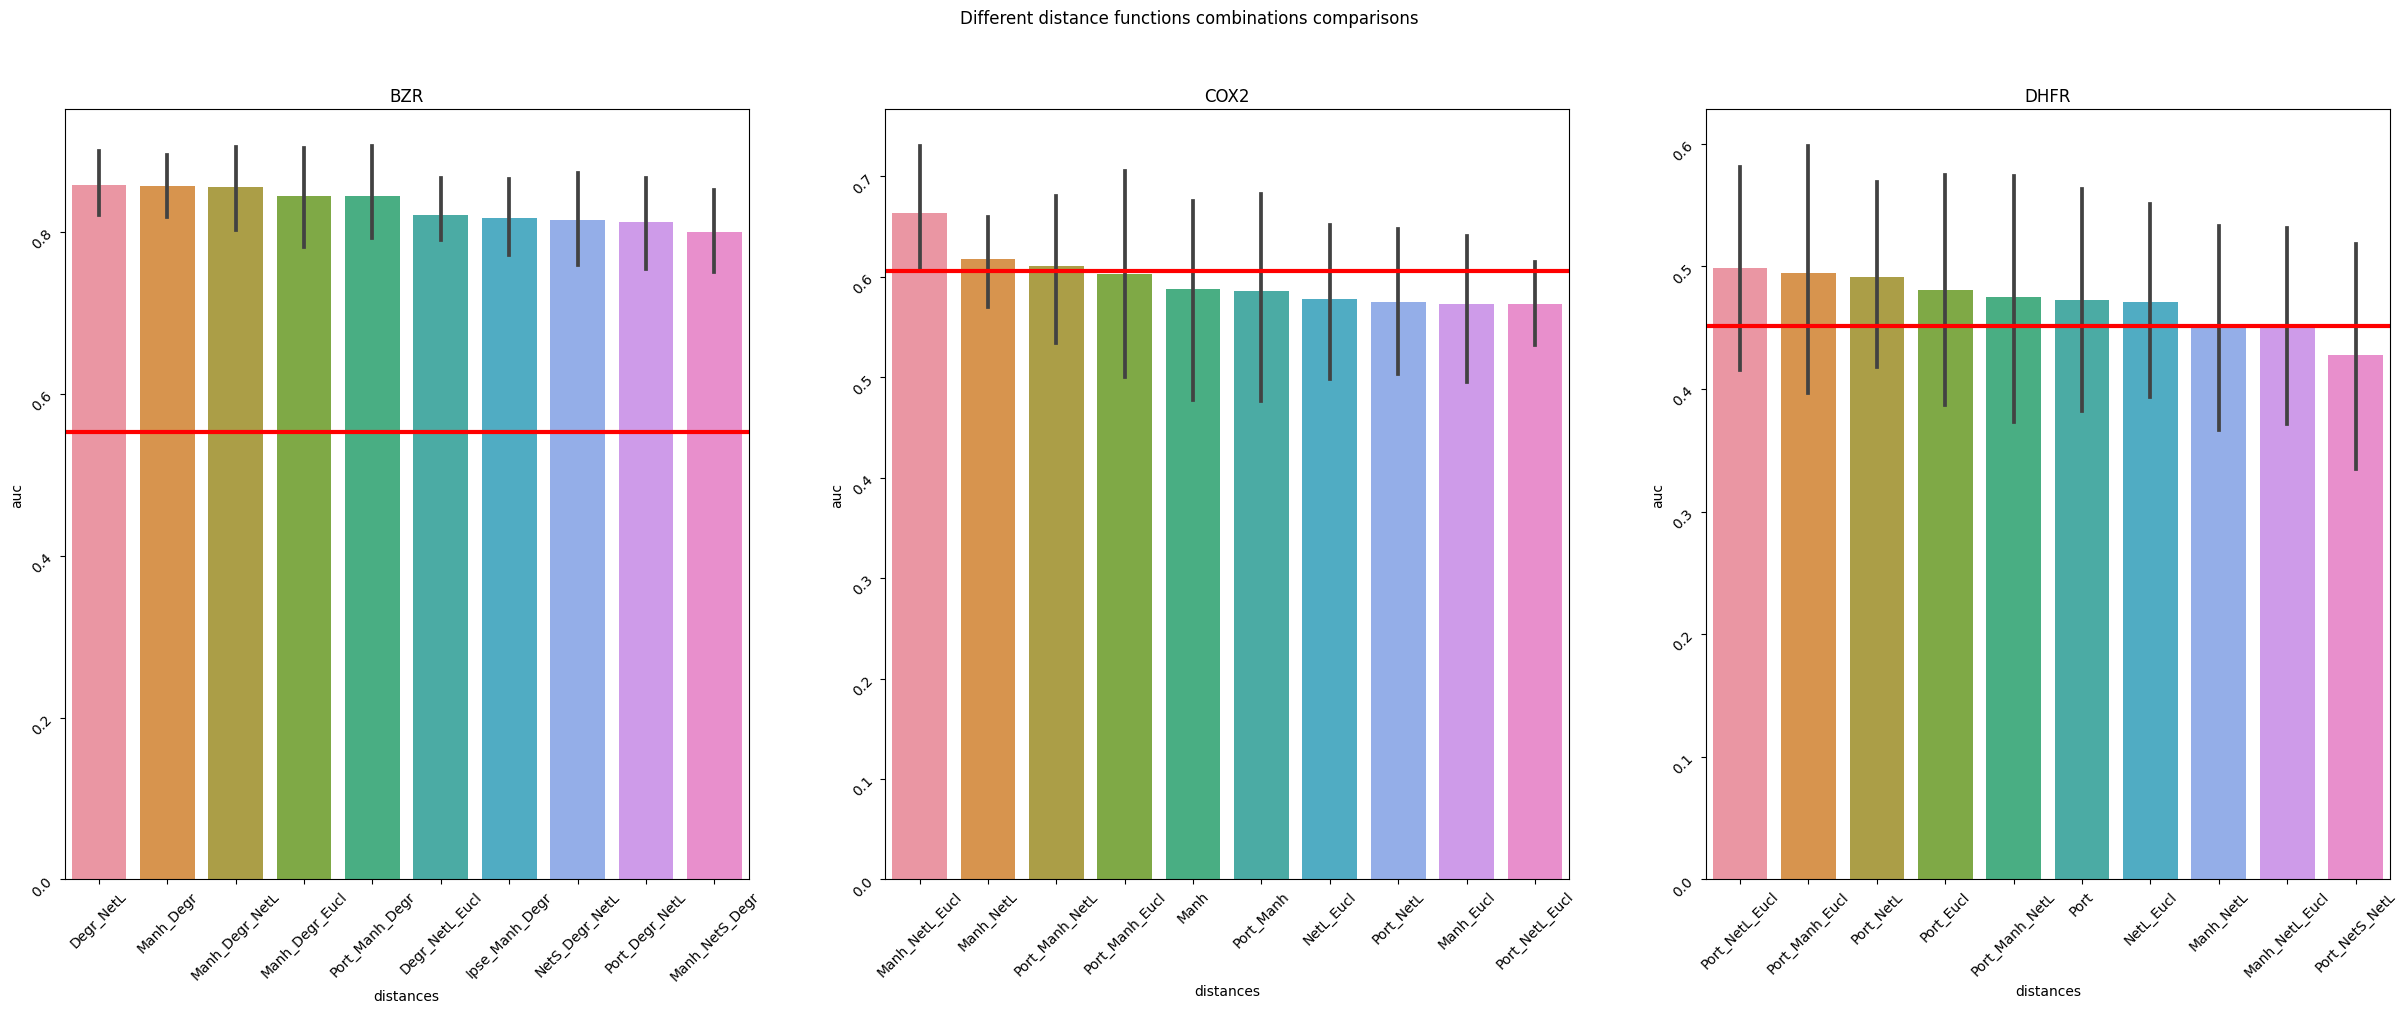

In [10]:
num_df = pd.read_csv(SELECTED_PATH / "results_selected_distances_graph.csv")
plot_top_n_dists(num_df, n = 10)

C:\Users\sebas\AppData\Local\Temp\ipykernel_12608\949431665.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


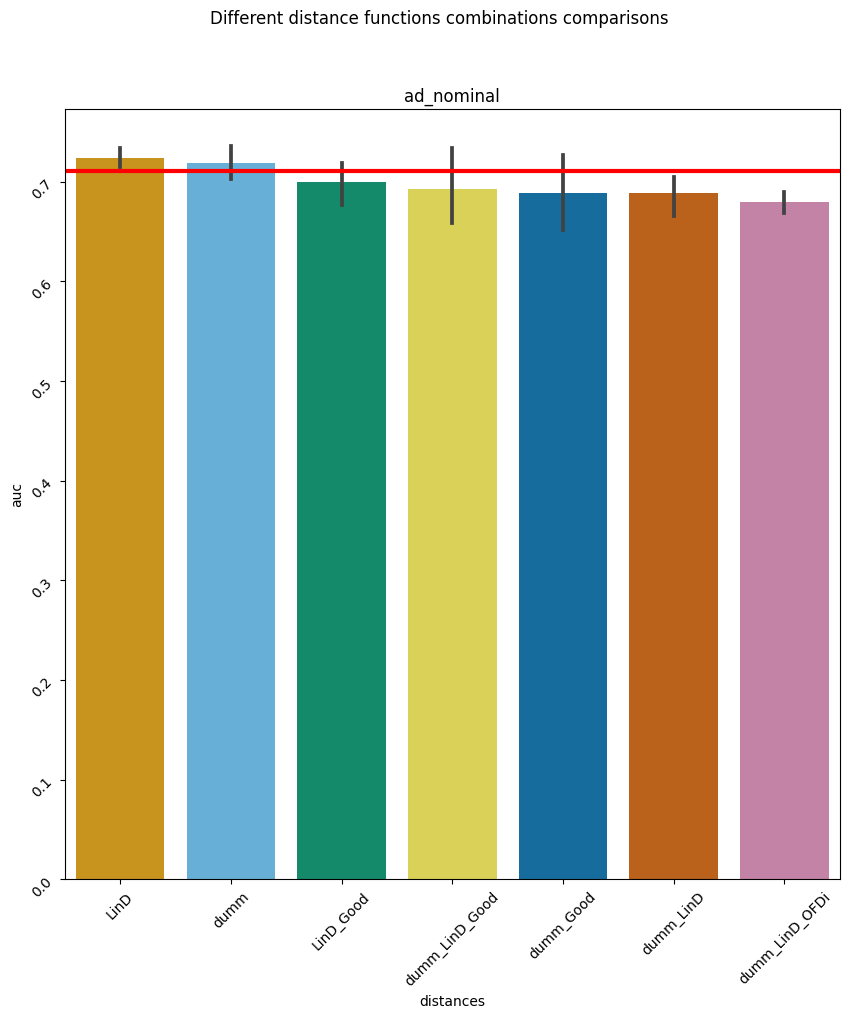

In [11]:
num_df = pd.read_csv(SELECTED_PATH / "results_selected_distances_binary.csv")
plot_top_n_dists(num_df)

C:\Users\sebas\AppData\Local\Temp\ipykernel_1608\949431665.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


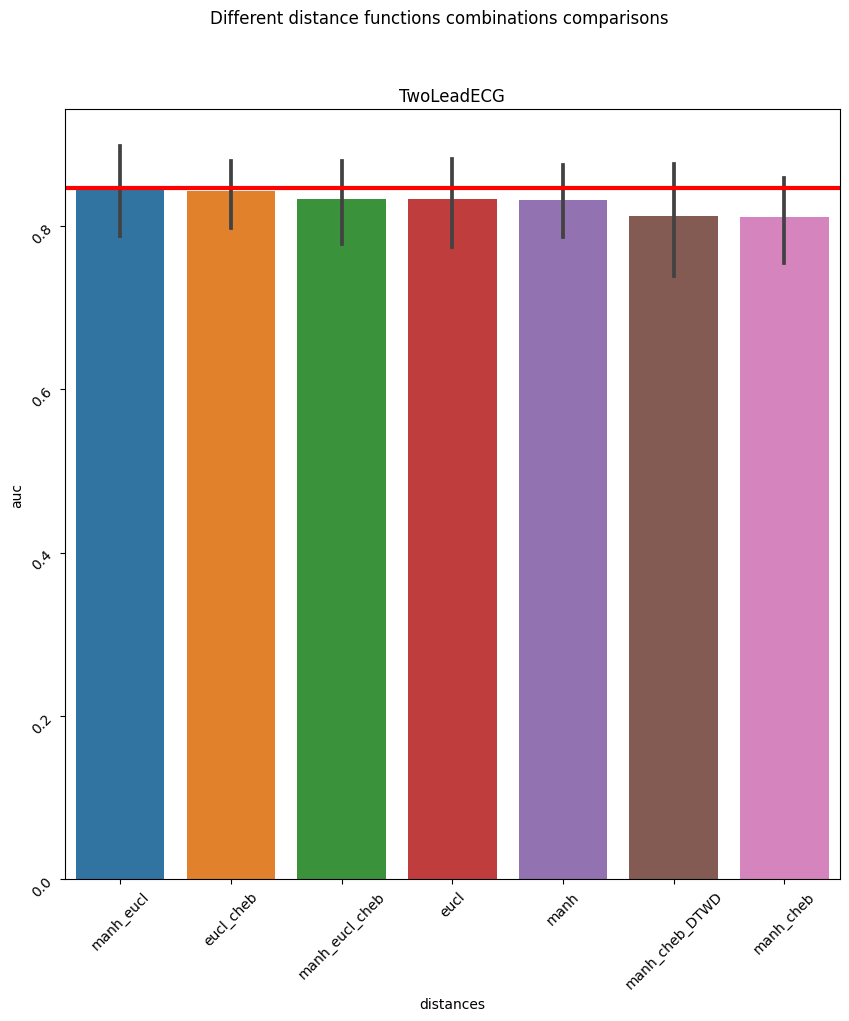

In [31]:
num_df = pd.read_csv(SELECTED_PATH / "results_selected_distances_timeseries.csv")
plot_top_n_dists(num_df)

C:\Users\sebas\AppData\Local\Temp\ipykernel_12608\949431665.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


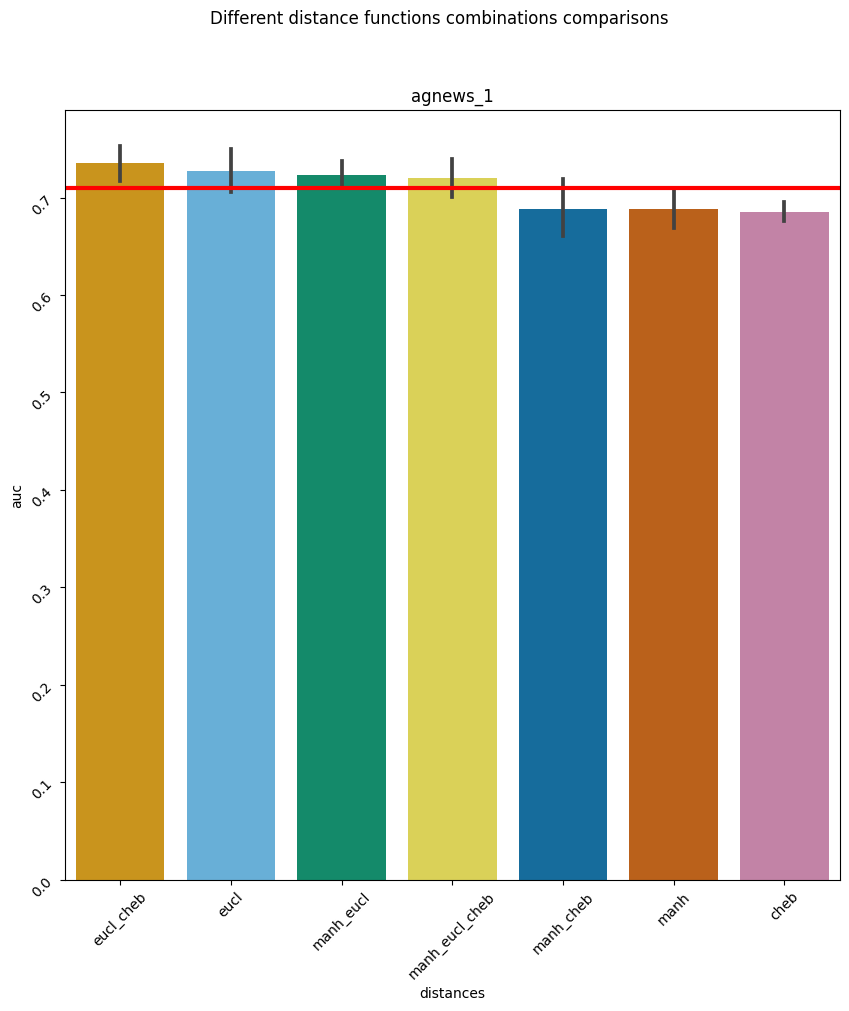

In [12]:
num_df = pd.read_csv(SELECTED_PATH / "results_selected_distances_nlp.csv")
plot_top_n_dists(num_df)

### Final outcomes

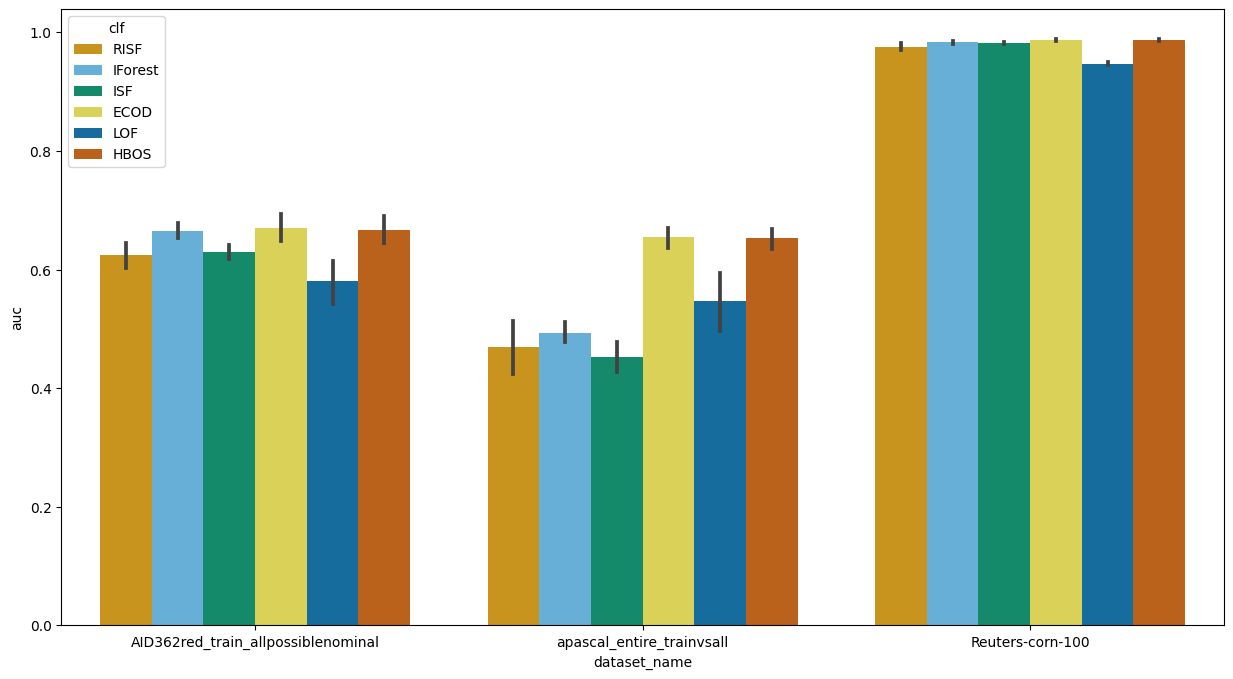

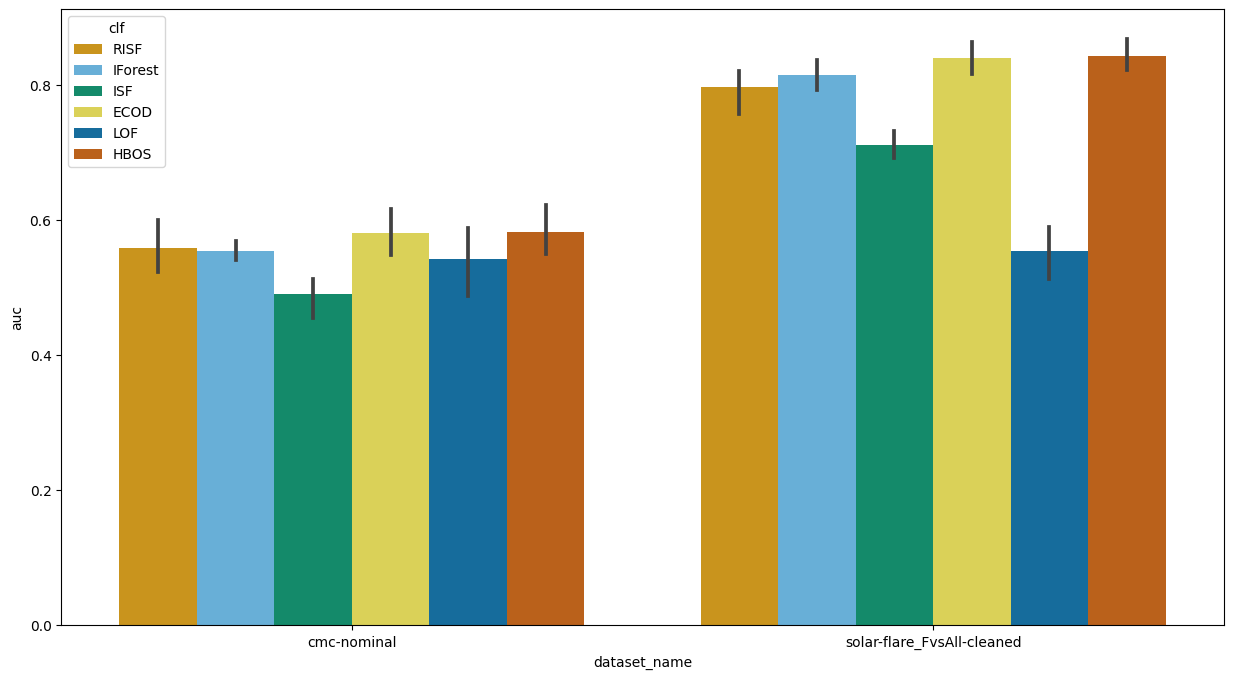

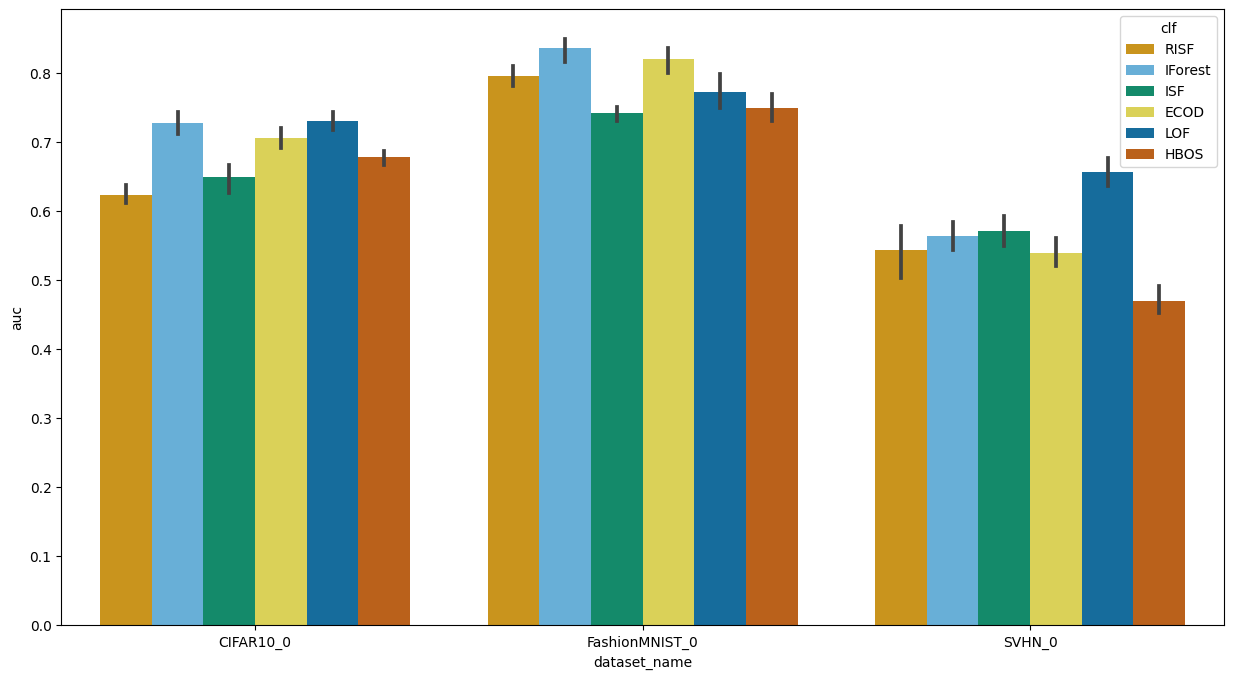

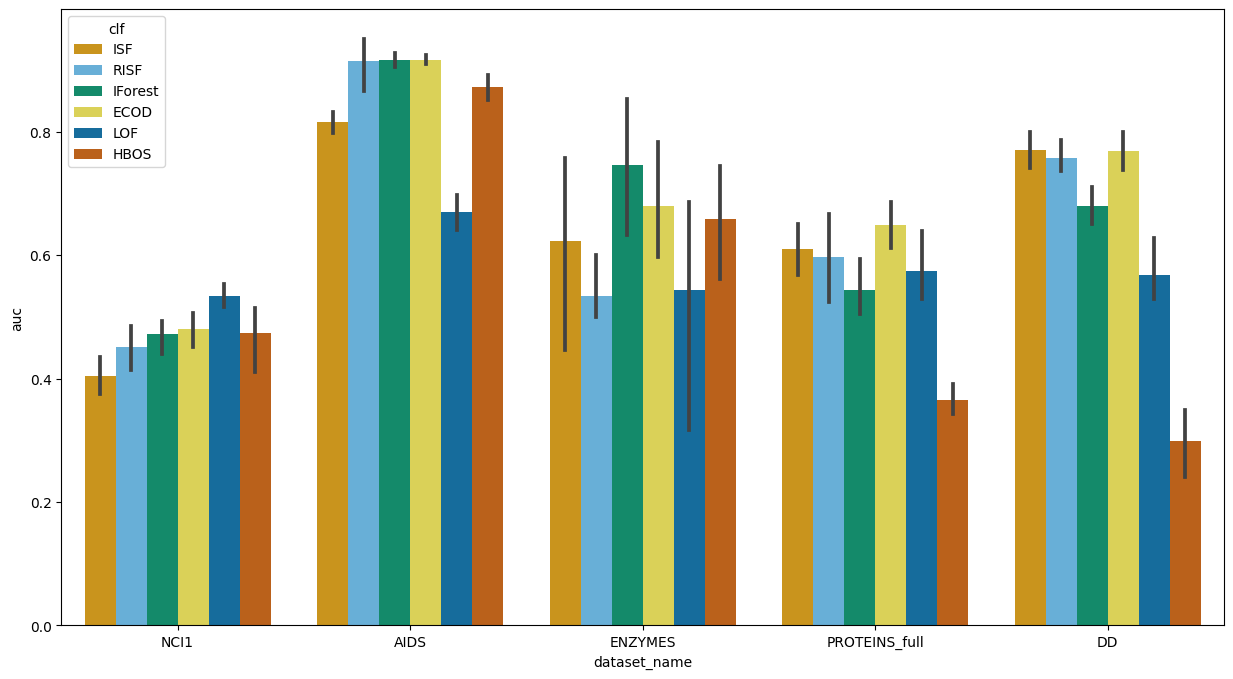

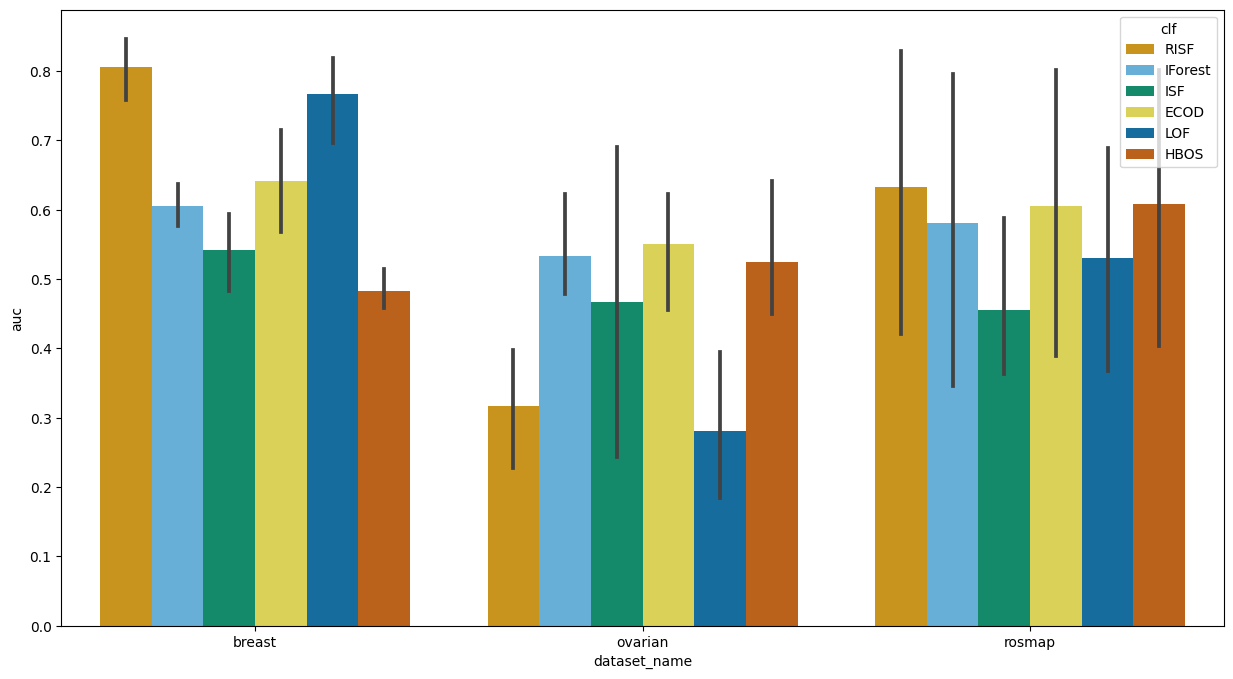

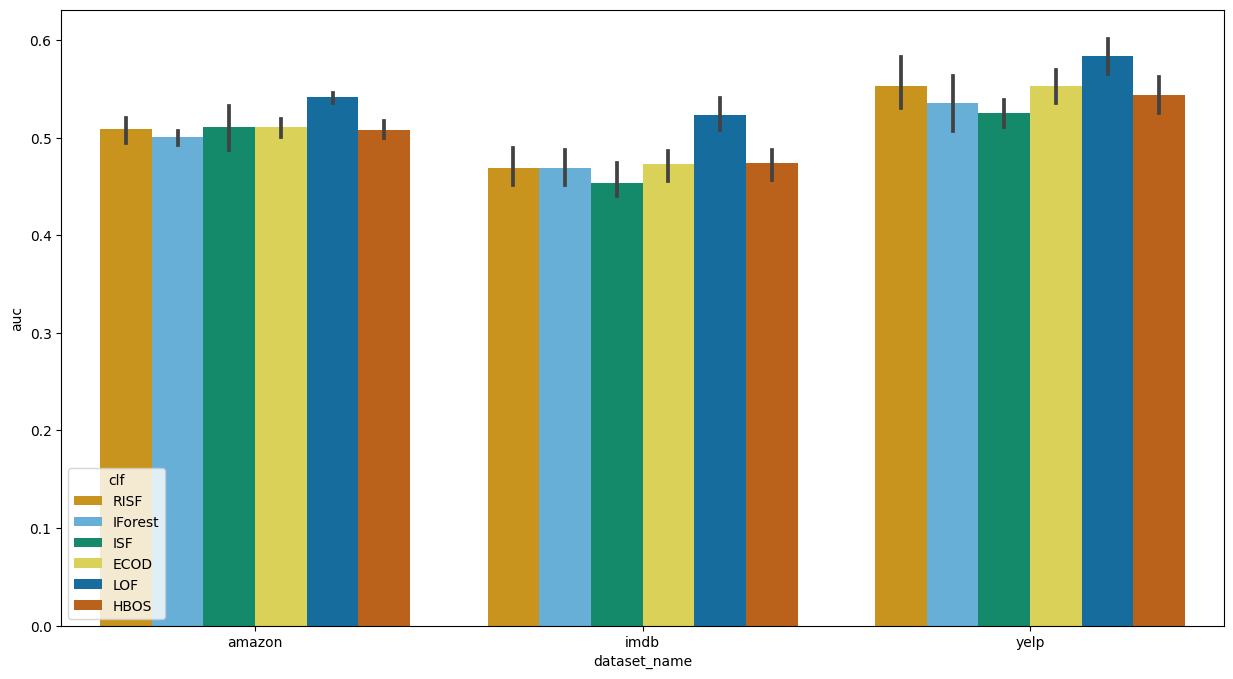

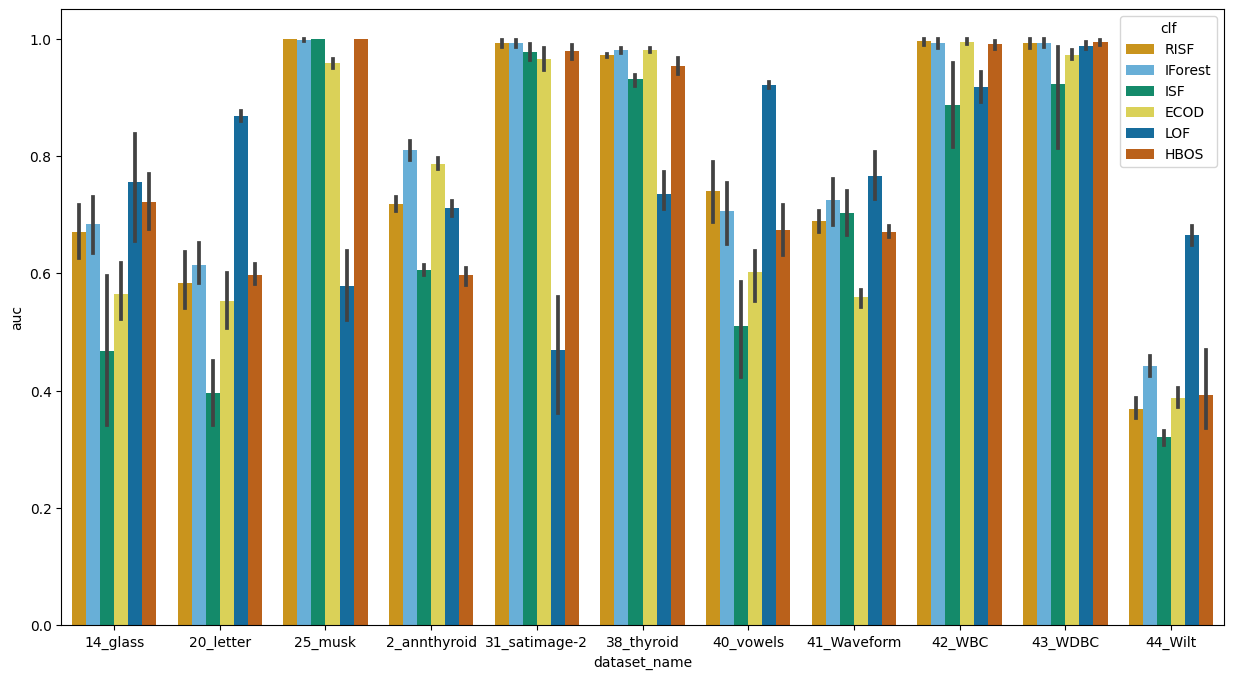

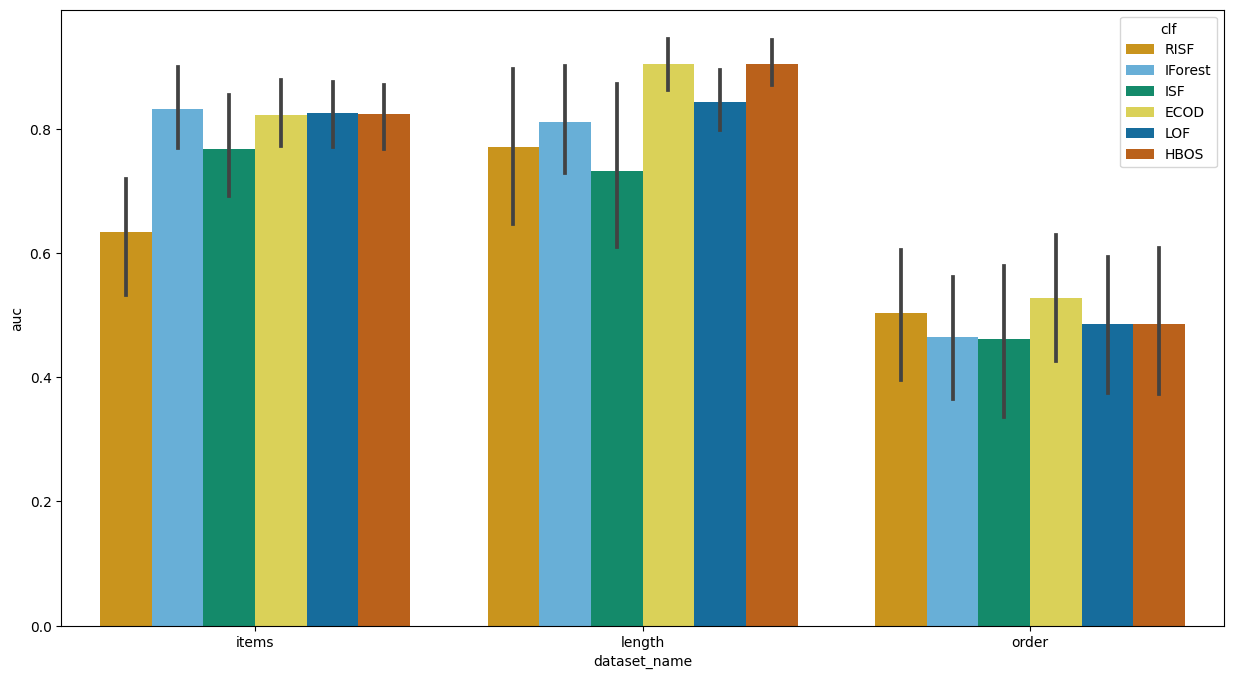

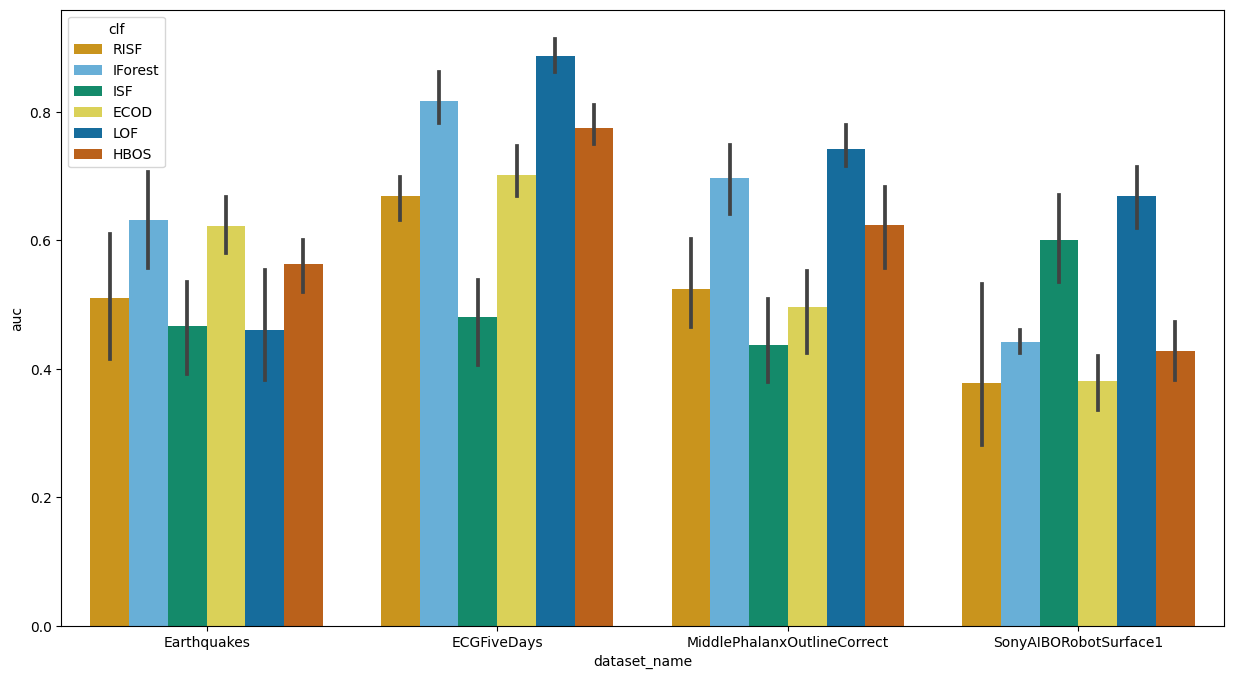

In [13]:
for dtype in ["binary", "nominal", "cv", "graph", "multiomics", "nlp", "numerical", "seq_of_sets", "timeseries"]:
    df = pd.read_csv(f'../results/experiments/{dtype}.csv')
    sns.barplot(data=df, x="dataset_name", y="auc", hue="clf")
    plt.gcf().set_size_inches(15, 8)
    plt.show()

# TODO:
* wybrac dystanse jakims rankiem.
* bierzemy bardzo proste rzeczy, nie wybieramy wiele roznych dystansow. Taki jest plus, ze dzialamy albo jak IF albo jak SF a w mixed dominujemy.
* `Robimy hyperparameter tuning.`
* `Dla sensitivity analysis dodac dummy i ma byc wtedy bardzo blisko IF.`
* `Zrobic tabelke i policzyc srednie ranki i zrobic testy statyczne.`

1. tabelka
2. dummy
3. hyperparameter search


In [2]:
dfs = []
for dtype in ["binary", "nominal", "cv", "graph", "multiomics", "nlp", "numerical", "seq_of_sets", "timeseries"]:
    dfs.append(pd.read_csv(f'../results/experiments/{dtype}.csv'))

df = pd.concat(dfs)

In [6]:
df.groupby(['dataset_name', 'clf']).mean().reset_index()

C:\Users\sebas\AppData\Local\Temp\ipykernel_14536\3349121555.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['dataset_name', 'clf']).mean().reset_index()


,dataset_name,clf,auc
0,14_glass,ECOD,0.56452
1,14_glass,HBOS,0.72256
2,14_glass,IForest,0.68390
3,14_glass,ISF,0.46722
4,14_glass,LOF,0.75592
...,...,...,...
217,yelp,HBOS,0.54372
218,yelp,IForest,0.53550
219,yelp,ISF,0.52536
220,yelp,LOF,0.58416
